In [1]:
from fastai import *
from fastai.vision import *
import imageio as io

import os
import pickle

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
path = '../../Data/'
def get_img_lbl(name):
    img_dir = f'{path}/{name}/test/'
    temp = os.listdir(img_dir)
    imgs = []
    for img in temp:
        if '_result' in img:
            continue
        imgs.append(img_dir + img)
        
    path_lbl = f'{path}/labels/{name}_processed.txt'
    with open(path_lbl, 'rb') as f:
        labels = pickle.load(f)
        
    return imgs, labels,

In [3]:
def get_patches(name, count=0):
    imgs, labels = get_img_lbl(name)
    dest = '../../Data/finetune/'
    c = count
    
    for img in imgs:
        x = io.imread(img)
        
        for label in labels:
            patch = x[label[1]:label[3], label[0]:label[2], :]
            patch_name = dest + f'{c}.jpg'
            io.imsave(patch_name, patch)
            c += 1
    return c

In [30]:
count = get_patches('parking1')

In [32]:
count = get_patches('parking2', count)

## Finetune model

In [4]:
path = Path('../../Data/finetune/')
data = (ImageList.from_folder(path)
                 .split_none()
                 .label_from_folder()
                 .transform(get_transforms(), size=(150,150))
                 .databunch(bs=64, num_workers=8)
                 .normalize(imagenet_stats))

In [5]:
learn = cnn_learner(data, models.resnet50, pretrained=False)

In [ ]:
learn.load('/home/kushaj/Desktop/Github/final_techgig/src/notebooks/final_techgig_classifier')

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


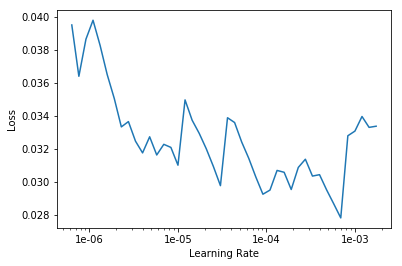

In [48]:
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(10, max_lr=1e-5)

epoch,train_loss,valid_loss,time
0,0.038119,#na#,00:24
1,0.034703,#na#,00:17
2,0.030092,#na#,00:17
3,0.026359,#na#,00:17
4,0.022208,#na#,00:17
5,0.018078,#na#,00:17
6,0.015056,#na#,00:17
7,0.013523,#na#,00:18
8,0.012335,#na#,00:18
9,0.011411,#na#,00:17


In [8]:
model = learn.model
model = model.to(torch.device('cpu'))
torch.save(model.state_dict(), 'f_classifier.pth')